In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score\

## Classical Models

In [10]:
# Load data
df = pd.read_csv('cleaned_emotion_classify_data.csv')
X = df['Comment_clean'].astype(str)
y = df['Emotion'].astype(str)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=67, stratify=y)


In [11]:
# TF-IDF vectorization
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

results = {}

In [12]:
# Logistic Regression
lr = LogisticRegression(max_iter=200)
lr.fit(X_train_tfidf, y_train)
pred_lr = lr.predict(X_test_tfidf)
results['Logistic Regression'] = {
    'accuracy': accuracy_score(y_test, pred_lr),
    'report': classification_report(y_test, pred_lr, output_dict=True)
}

In [13]:
# Linear SVM
svm = LinearSVC()
svm.fit(X_train_tfidf, y_train)
pred_svm = svm.predict(X_test_tfidf)
results['Linear SVM'] = {
    'accuracy': accuracy_score(y_test, pred_svm),
    'report': classification_report(y_test, pred_svm, output_dict=True)
}

In [14]:
# Naive Bayes
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)
pred_nb = nb.predict(X_test_tfidf)
results['Naive Bayes'] = {
    'accuracy': accuracy_score(y_test, pred_nb),
    'report': classification_report(y_test, pred_nb, output_dict=True)
}

In [15]:
# Random Forest
rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(X_train_tfidf, y_train)
pred_rf = rf.predict(X_test_tfidf)
results['Random Forest'] = {
    'accuracy': accuracy_score(y_test, pred_rf),
    'report': classification_report(y_test, pred_rf, output_dict=True)
}

In [16]:
results

{'Logistic Regression': {'accuracy': 0.9335016835016835,
  'report': {'anger': {'precision': 0.9378238341968912,
    'recall': 0.905,
    'f1-score': 0.9211195928753181,
    'support': 400.0},
   'fear': {'precision': 0.9258312020460358,
    'recall': 0.9329896907216495,
    'f1-score': 0.9293966623876765,
    'support': 388.0},
   'joy': {'precision': 0.9367396593673966,
    'recall': 0.9625,
    'f1-score': 0.9494451294697904,
    'support': 400.0},
   'accuracy': 0.9335016835016835,
   'macro avg': {'precision': 0.9334648985367745,
    'recall': 0.9334965635738831,
    'f1-score': 0.933320461577595,
    'support': 1188.0},
   'weighted avg': {'precision': 0.9335420065821355,
    'recall': 0.9335016835016835,
    'f1-score': 0.9333600959128467,
    'support': 1188.0}}},
 'Linear SVM': {'accuracy': 0.9368686868686869,
  'report': {'anger': {'precision': 0.9352331606217616,
    'recall': 0.9025,
    'f1-score': 0.9185750636132316,
    'support': 400.0},
   'fear': {'precision': 0.92676

## Graphs

Accuracy comparison

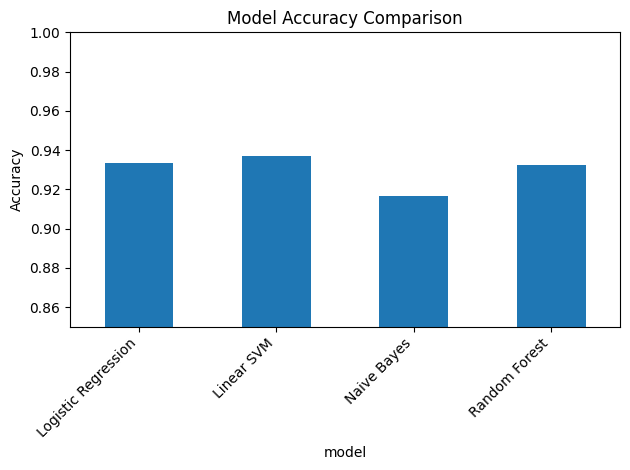

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

acc_df = pd.DataFrame({
    'model': list(results.keys()),
    'accuracy': [results[m]['accuracy'] for m in results]
})

acc_df = acc_df.set_index('model')

acc_df.plot(kind='bar', legend=False)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0.85, 1.0)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Macro precision, recall, F1 per model

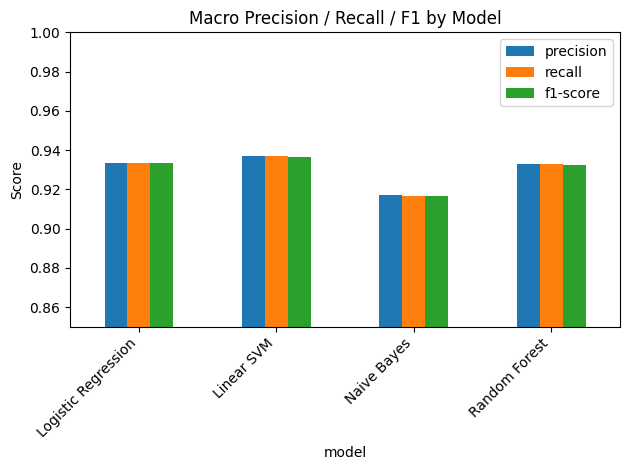

In [19]:
macro_df = pd.DataFrame({
    'model': list(results.keys()),
    'precision': [results[m]['report']['macro avg']['precision'] for m in results],
    'recall': [results[m]['report']['macro avg']['recall'] for m in results],
    'f1-score': [results[m]['report']['macro avg']['f1-score'] for m in results],
})

macro_df = macro_df.set_index('model')

macro_df.plot(kind='bar')
plt.ylabel('Score')
plt.title('Macro Precision / Recall / F1 by Model')
plt.ylim(0.85, 1.0)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Per-class F1-score comparison across models

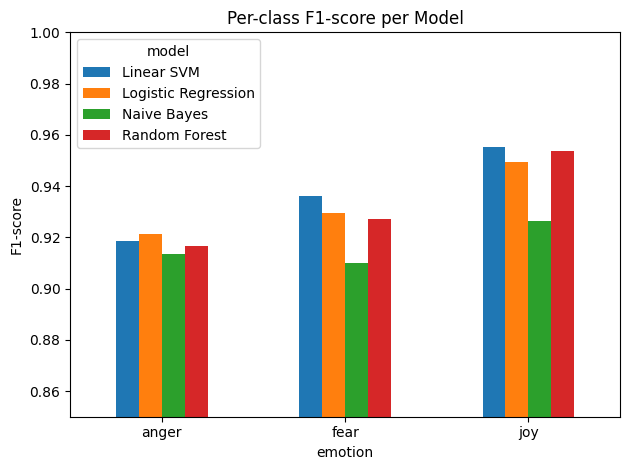

In [ ]:
classes = ['anger', 'fear', 'joy']

rows = []
for model, res in results.items():
    for cls in classes:
        rows.append({
            'model': model,
            'emotion': cls,
            'f1': res['report'][cls]['f1-score']
        })

per_class_df = pd.DataFrame(rows)

pivot_f1 = per_class_df.pivot(index='emotion', columns='model', values='f1')

pivot_f1.plot(kind='bar')
plt.ylabel('F1-score')
plt.title('Per-class F1-score per Model')
plt.ylim(0.85, 1.0)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
